In [1]:
from random import randint as randi
from random import random as rand
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)
from random import random as randn
from matplotlib.markers import MarkerStyle as MS
import math


# Boston House Prices dataset

In [9]:
from sklearn.datasets import load_boston
import pandas as pd

In [10]:
data = load_boston()

In [11]:
y = data["target"]

In [12]:
data = pd.DataFrame(data = data["data"], columns=data["feature_names"])

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Single Feature Analysis

In [43]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


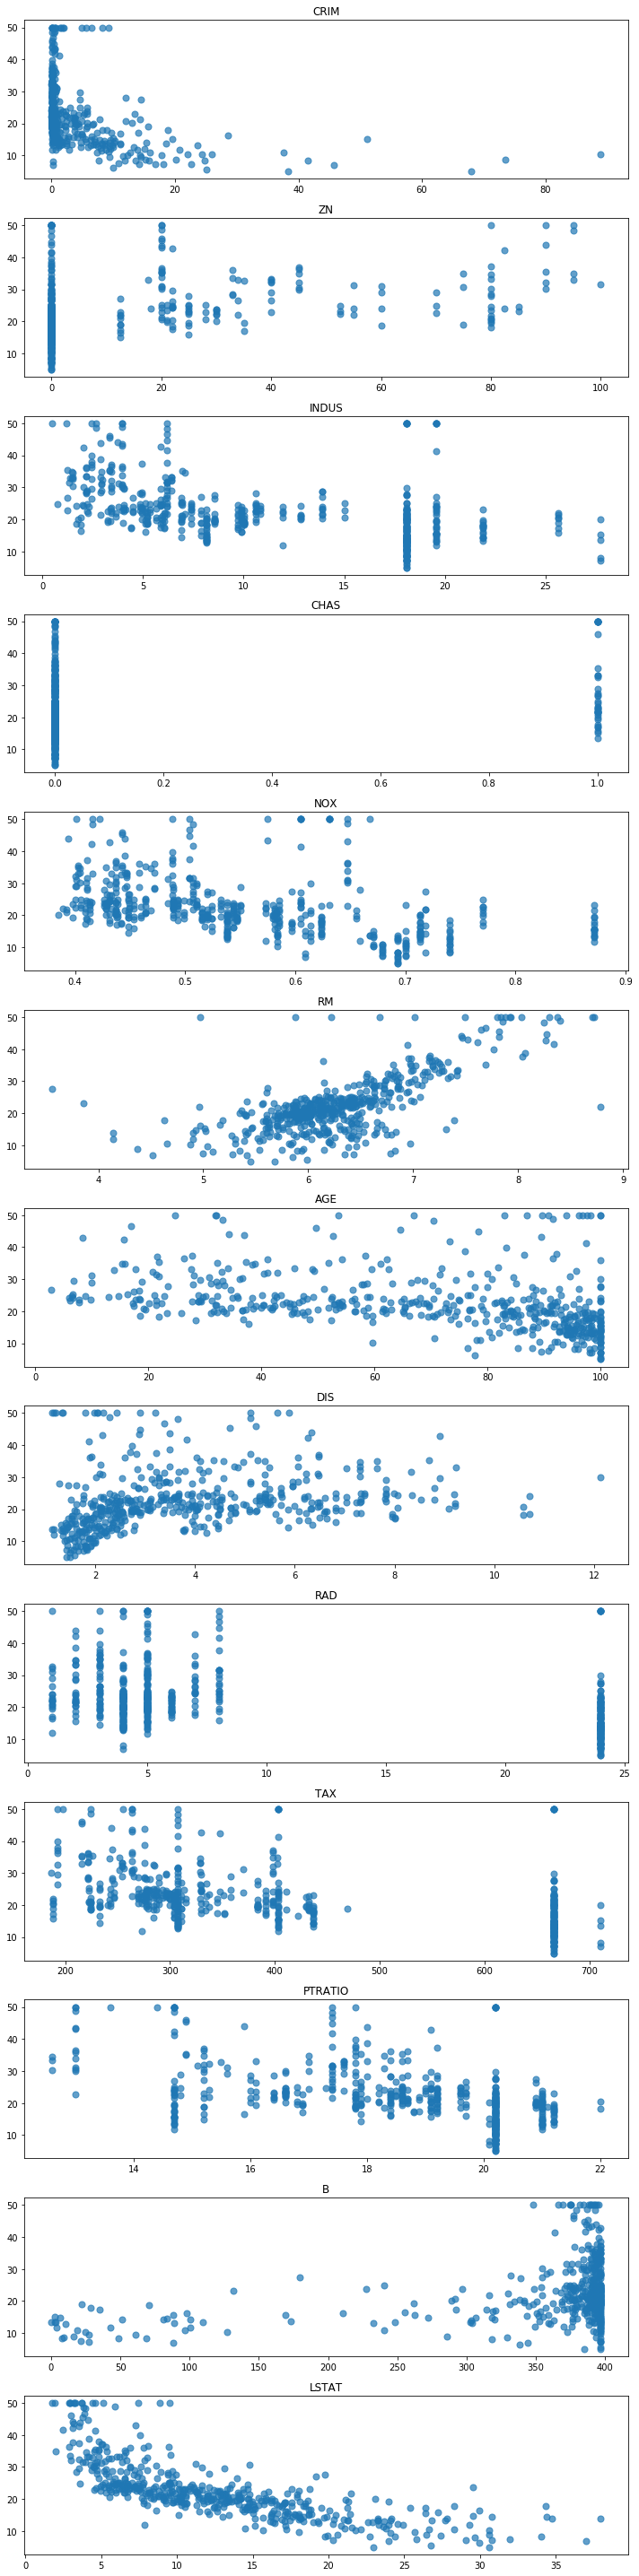

In [14]:
cols = data.columns
n = len(cols)
plt.figure(figsize=(10,40))
for i, col in enumerate(cols):
    plt.subplot(n,1,i+1)
    plt.scatter(data.loc[:,col], y, alpha = .7, s = 50)
    #plt.hist(data.loc[:,col], bins = 30)
    plt.title(col)
    
plt.tight_layout()

# Fit model

In [15]:
from scipy.stats import binned_statistic

In [45]:
stats, bin_edges, _ = binned_statistic(data["LSTAT"], y, bins = 15)
bins = bin_edges[:-1]

In [46]:
# bins, stats = zip(*[[b, s] for b, s in zip(bins, stats) if not math.isnan(s)])
bins, stats = bins[~np.isnan(stats)], stats[~np.isnan(stats)]

In [47]:
bins, stats

(array([  1.73 ,   4.146,   6.562,   8.978,  11.394,  13.81 ,  16.226,
         18.642,  21.058,  23.474,  25.89 ,  28.306,  30.722,  33.138,
         35.554]),
 array([ 41.55      ,  29.62432432,  25.95205479,  22.84084507,
         20.52033898,  18.84150943,  16.23265306,  14.992     ,
         13.69      ,  11.81333333,  12.05454545,  11.81818182,
          9.66666667,  13.625     ,  10.4       ]))

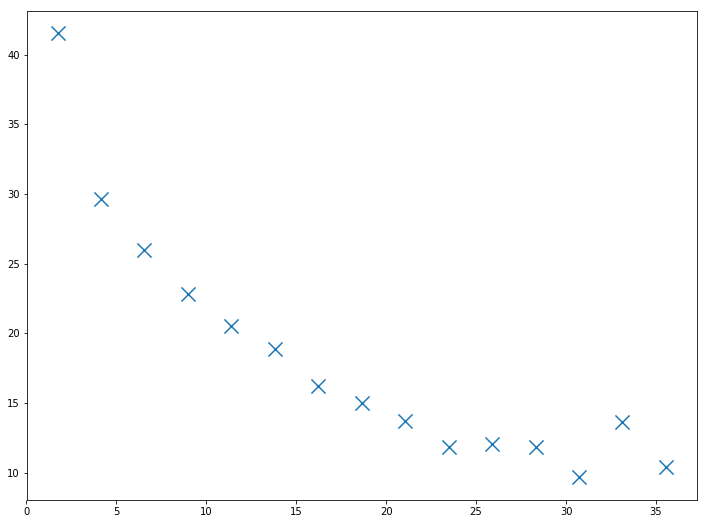

In [48]:
plt.scatter(bins, stats, s = 200, marker="x")

### Fit (degree 1)

In [49]:
a, b = np.polyfit(bins, stats, 1)
a,b

(-0.71186128997483511, 31.511948363726376)

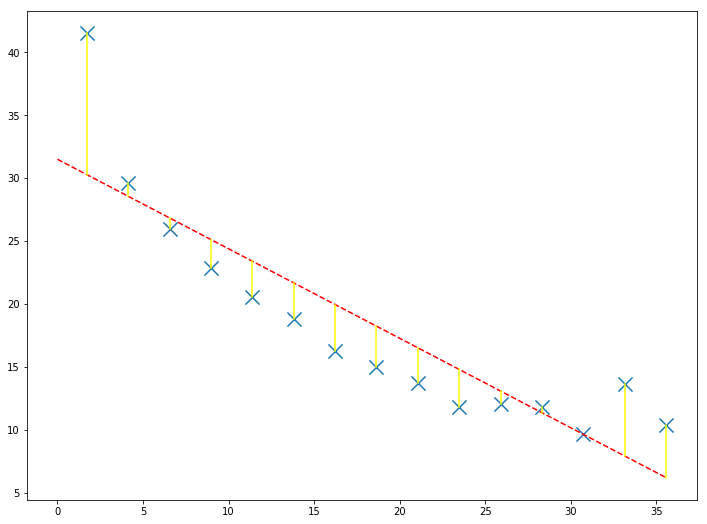

In [50]:
plt.scatter(bins, stats, s = 200, marker="x")
plt.plot([0, 1 * max(bins)], [b, a * max(bins) + b ], "r--")
for i, s in zip(bins, stats):
    plt.plot([i, i], [s, np.polyval([a,b], i)], c="yellow")

In [51]:
TH1 = np.linspace(-1.4, -.6, 50)
COST = np.array([np.average((np.polyval((e,38), bins) - stats)**2) for e in TH1])

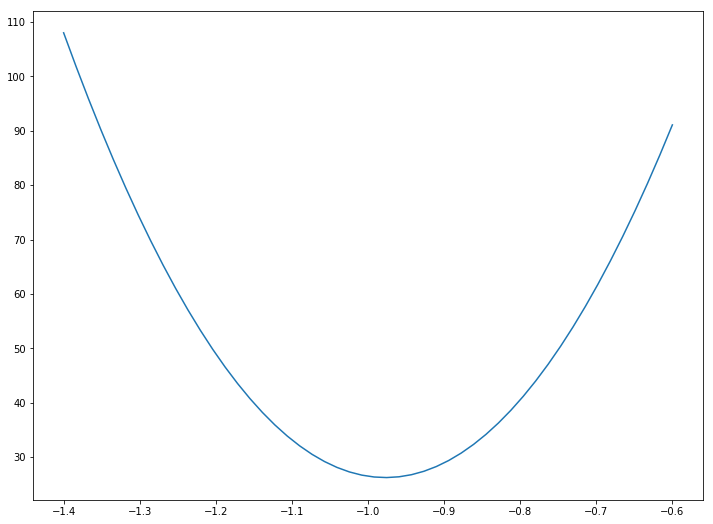

In [52]:
plt.plot(TH1, COST)

In [53]:
TH1, TH2 = np.meshgrid(np.linspace(-1, 0, 100), np.linspace(0, 50, 100))

In [54]:
COST = np.array([ [ np.average((np.polyval((e1,e2), bins) - stats)**2) for e1, e2 in zip(r1,r2)] for r1,r2 in zip(TH1, TH2)])

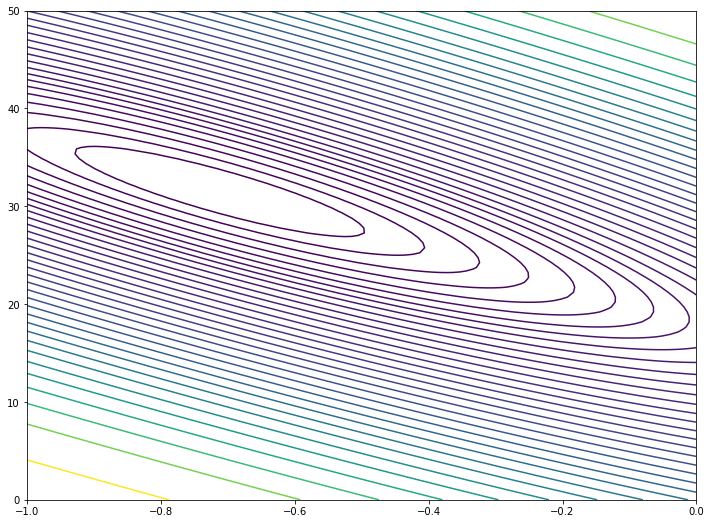

In [55]:
plt.contour(TH1, TH2, COST, levels = np.sort(COST.flatten())[::300])

### Fit degree 10, n = 15

In [56]:
p = np.polyfit(bins, stats, 5)

In [57]:
_x = range(int(max(bins)))
_y = np.polyval(p, _x)

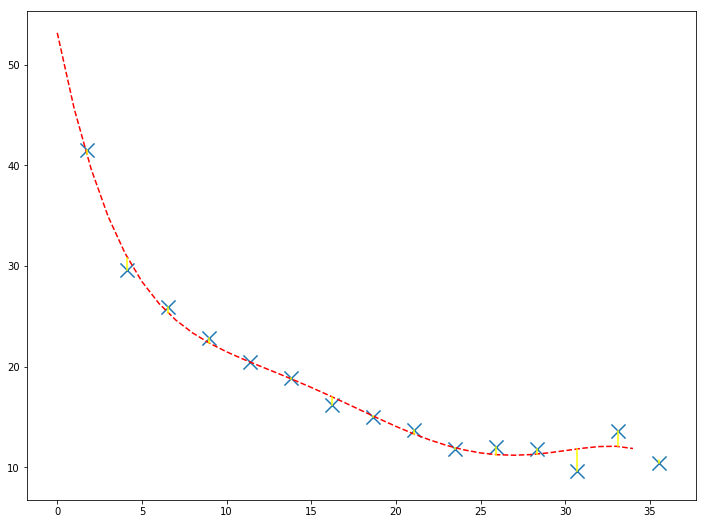

In [58]:
plt.plot(_x, _y, "r--")
plt.scatter(bins, stats, s = 200, marker="x")
for i, s in zip(bins, stats):
    plt.plot([i, i], [s, np.polyval(p, i)], c="yellow")

# Analisar função de custo (squared error)

In [31]:
nx = np.concatenate((bins, bins + np.max(bins)))
ny = np.concatenate((stats, stats[::-1]))

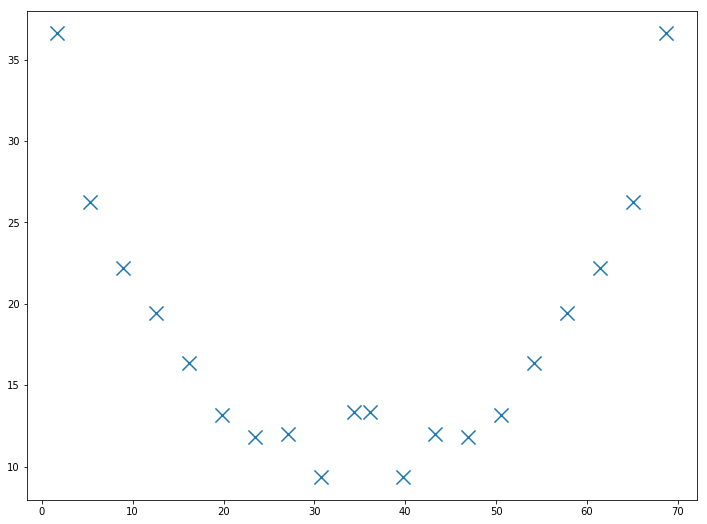

In [32]:
plt.scatter(nx, ny, s = 200, marker="x")

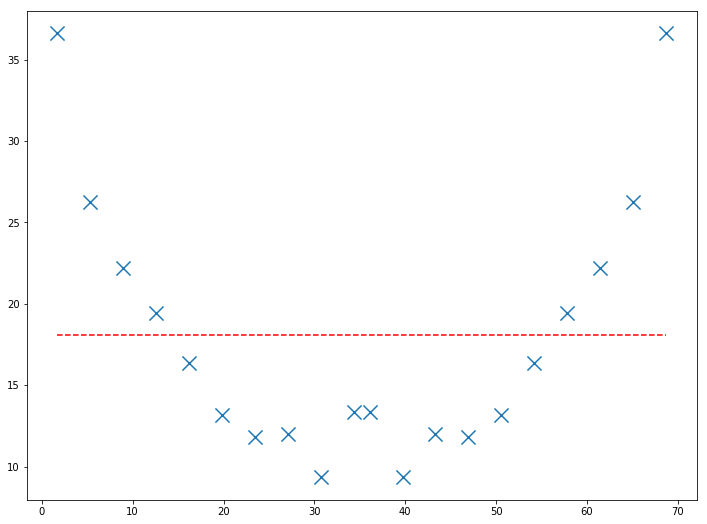

In [33]:
p = np.polyfit(nx, ny, 1)
plt.scatter(nx, ny, s = 200, marker="x")
plt.plot([np.min(nx), np.max(nx)], [np.polyval(p, np.min(nx)), np.polyval(p, np.max(nx))], "r--")

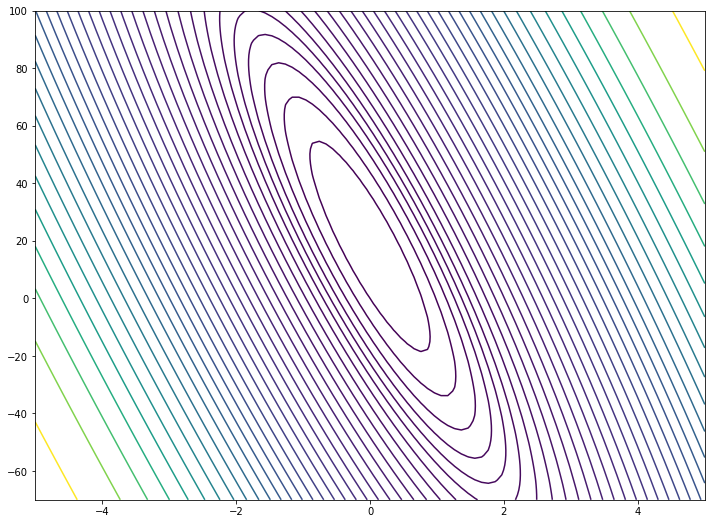

In [34]:
TH1, TH2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-70, 100, 100))
COST = np.array([ [ np.average((np.polyval((e1,e2), nx) - ny)**2) for e1, e2 in zip(r1,r2)] for r1,r2 in zip(TH1, TH2)])
plt.contour(TH1, TH2, COST, levels = np.sort(COST.flatten())[::300])

# Validação

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(bins, stats, test_size = .5)

In [37]:
# X_train = bins[::2]
# X_test = bins[1::2]
# y_train = stats[::2]
# y_test = stats[1::2]

In [38]:
p = np.polyfit(X_train, y_train,4) # começar com 4, testar outros menores
_x = range(int(max(bins)))
_y = np.polyval(p, _x)

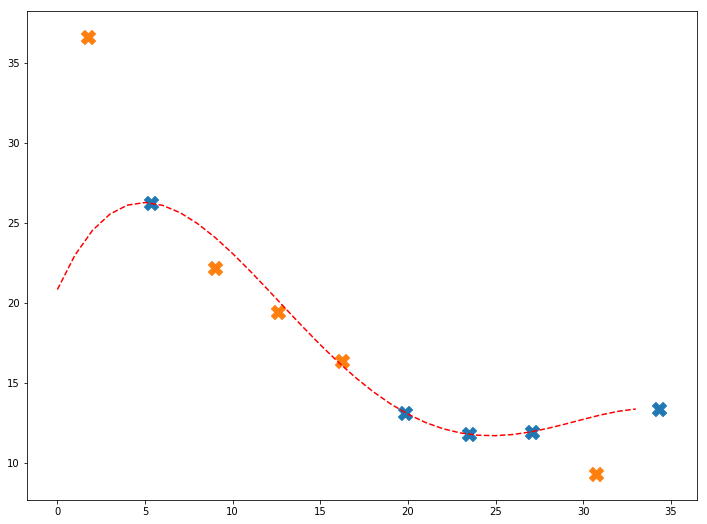

In [39]:
plt.plot(_x, _y, "r--")
plt.scatter(X_train, y_train, s = 200, marker="X")
plt.scatter(X_test, y_test, s = 200, marker="X")

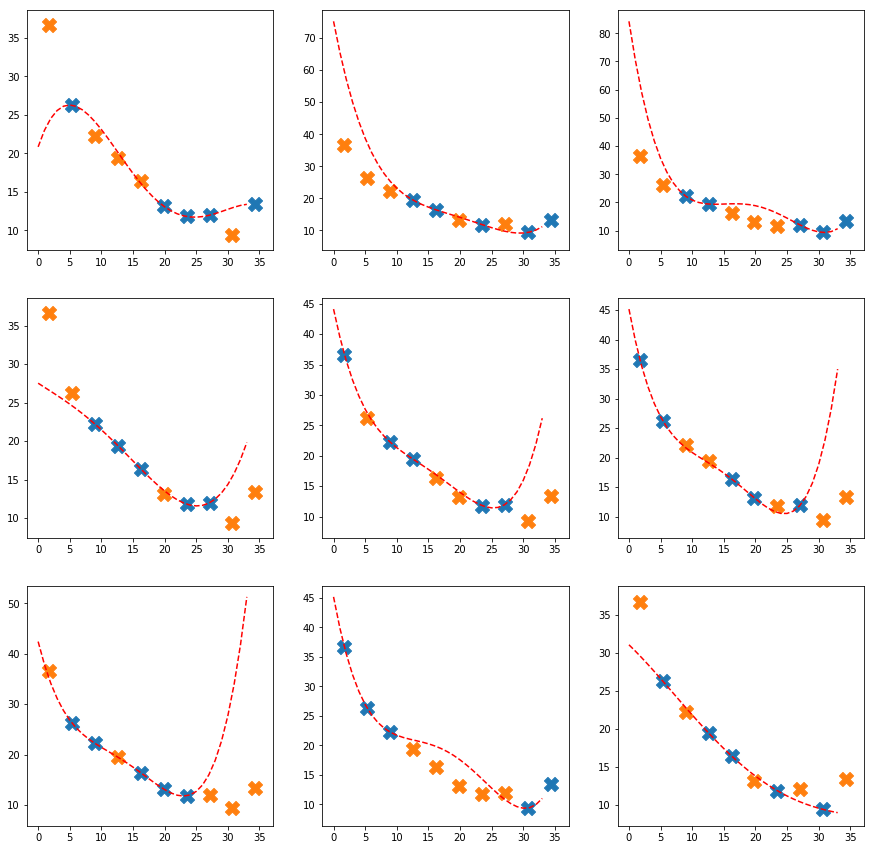

In [42]:
plt.figure(figsize=(15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    X_train, X_test, y_train, y_test = train_test_split(bins, stats, test_size = .5)
    p = np.polyfit(X_train, y_train,4) # testar 4 e 2 para 10 instancias
    _x = range(int(max(bins)))
    _y = np.polyval(p, _x)
    plt.plot(_x, _y, "r--")
    plt.scatter(X_train, y_train, s = 200, marker="X")
    plt.scatter(X_test, y_test, s = 200, marker="X")